___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Capstone Project
## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

### Goal:

**Your goal is to complete the tasks below based off the 538 article and see if you reach a similar conclusion. You will need to use your pandas and visualization skills to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.**

---
---

**Complete the tasks written in bold.**

---
----

## Part One: Understanding the Background and Data


**TASK: Read this article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

----

**TASK: After reading the article, read these two tables giving an overview of the two .csv files we will be working with:**

### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

----

**TASK: Import any libraries you think you will use:**

In [80]:
# IMPORT HERE!

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part Two: Exploring Fandango Displayed Scores versus True User Ratings

Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.

**TASK: Run the cell below to read in the fandango_scrape.csv file**

In [82]:
fandango = pd.read_csv("fandango_scrape.csv")

**TASK: Explore the DataFrame Properties and Head.**

In [83]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [84]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [85]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**TASK: Let's explore the relationship between popularity of a film and its rating. Create a scatterplot showing the relationship between rating and votes. Feel free to edit visual styling to your preference.**

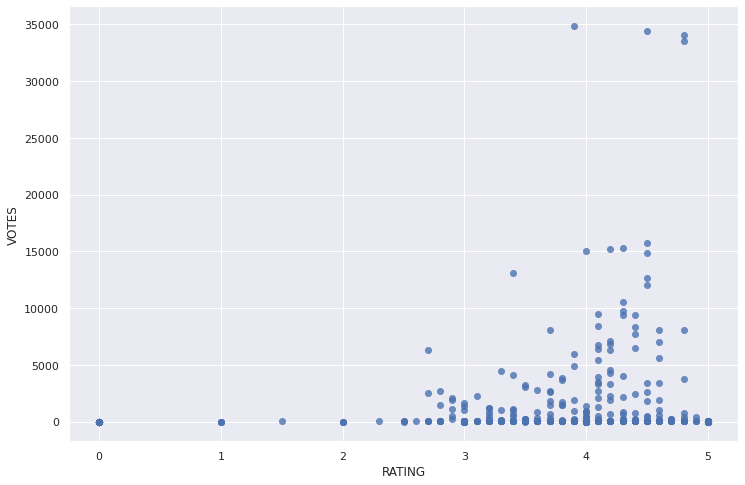

In [86]:
# CODE HERE
plt.figure(figsize=(12,8))
sns.scatterplot(x='RATING',y='VOTES',data=fandango,s=50,linewidth=0,alpha=0.8)

**TASK: Calculate the correlation between the columns:**

In [87]:
# CODE HERE
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


STARS so corr to RATING

STARS have weak relation with VOTES

**TASK: Assuming that every row in the FILM title column has the same format:**

    Film Title Name (Year)
    
**Create a new column that is able to strip the year from the title strings and set this new column as YEAR**

In [88]:
# CODE HERE
fandango['YEAR']=fandango['FILM'].apply(lambda a:a.split("(")[1].split(")")[0])
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


**TASK: How many movies are in the Fandango DataFrame per year?**

In [89]:
#CODE HERE
fandango['YEAR'].value_counts()

2015                  474
2014                   24
Stratford Festival      2
Shi Gu                  1
2016                    1
1964                    1
2012                    1
Name: YEAR, dtype: int64

**TASK: Visualize the count of movies per year with a plot:**

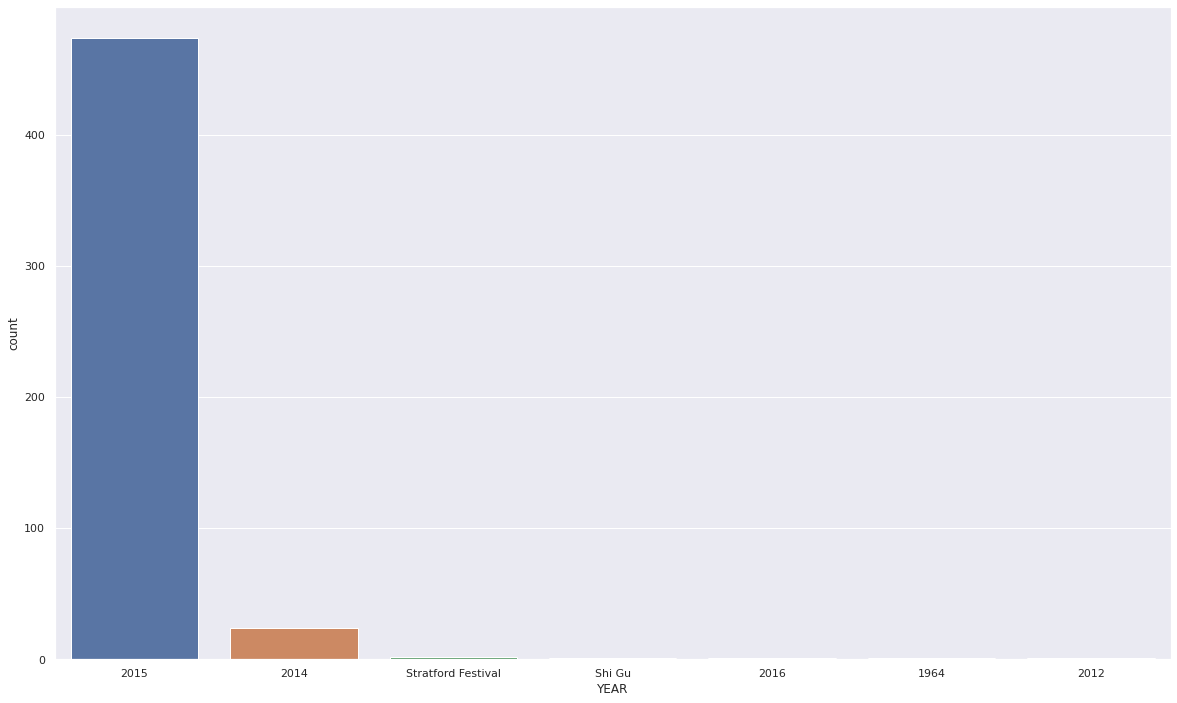

In [90]:
#CODE HERE
sns.countplot(x='YEAR',data=fandango)

**TASK: What are the 10 movies with the highest number of votes?**

In [91]:
#CODE HERE
fandango.sort_values(by=['VOTES'],ascending=False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**TASK: How many movies have zero votes?**

In [92]:
#CODE HERE
len(fandango[fandango['VOTES']==0])

69

**TASK: Create DataFrame of only reviewed films by removing any films that have zero votes.**

In [93]:
#CODE HERE
df=fandango[fandango['VOTES']!=0]
df.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [94]:
df['VOTES'].value_counts()

1       35
4       22
2       19
5       15
8       13
        ..
1651     1
1501     1
1462     1
1430     1
482      1
Name: VOTES, Length: 209, dtype: int64

----

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

**TASK: Create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). Clip the KDEs to 0-5.**

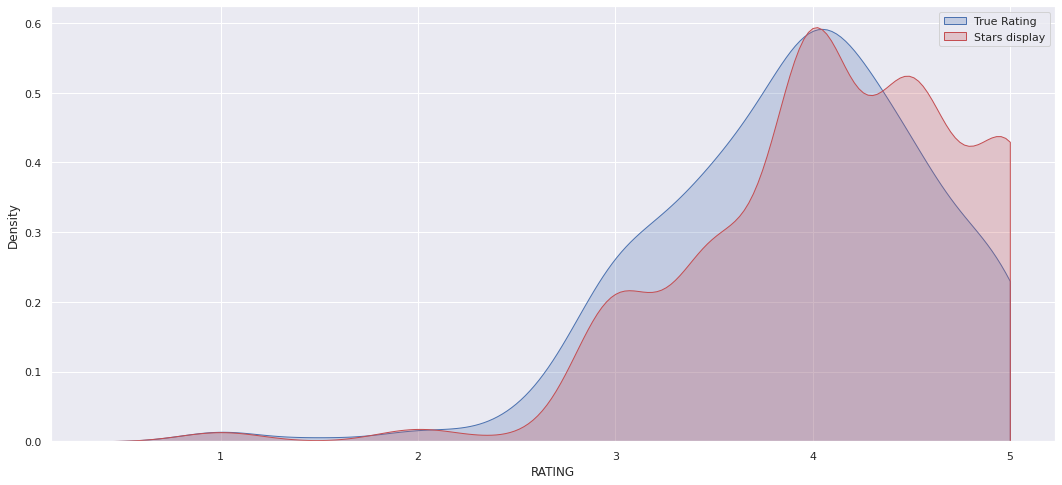

In [95]:
#CODE HERE
plt.figure(figsize=(18,8))
sns.kdeplot(data=df,x='RATING' ,clip=[0,5],shade=True,color='b',label="True Rating") 
sns.kdeplot(data=df,x='STARS' ,clip=[0,5],shade=True,color='r',label="Stars display") 
plt.legend() 

**TASK: Let's now actually quantify this discrepancy. Create a new column of the different between STARS displayed versus true RATING. Calculate this difference with STARS-RATING and round these differences to the nearest decimal point.**

In [96]:
#CODE HERE
df['STARS_DIFF']=round(df['STARS']-df['RATING'],1)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**TASK: Create a count plot to display the number of times a certain difference occurs:**

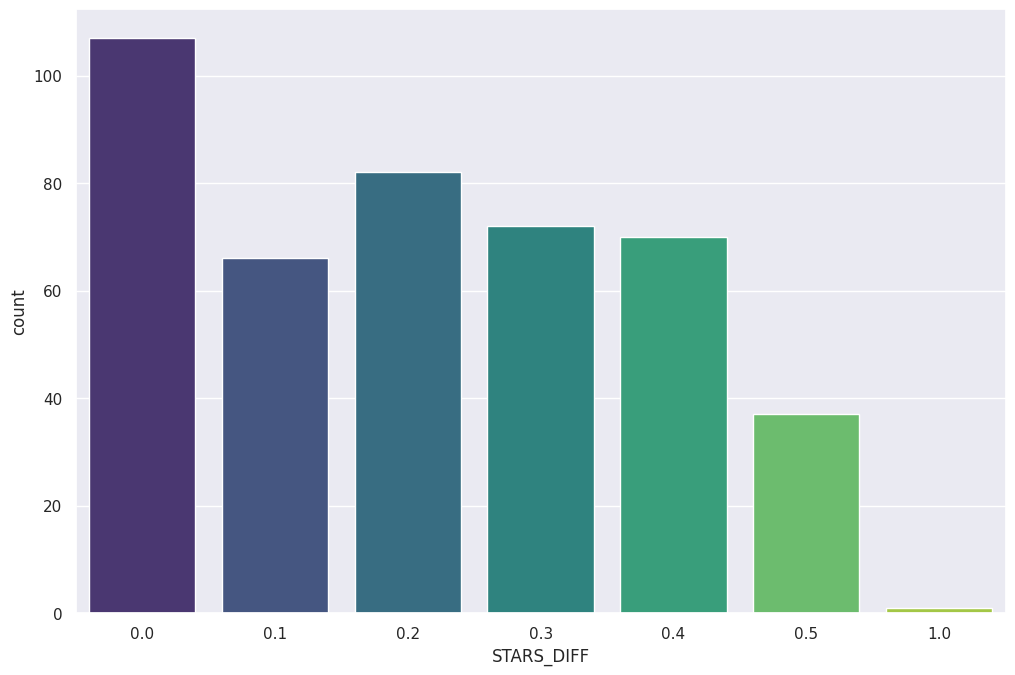

In [97]:
#CODE HERE
plt.figure(figsize=(12,8),dpi=100)
sns.countplot(x='STARS_DIFF',data=df,palette='viridis')

**TASK: We can see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?**

In [98]:
#CODE HERE
df[df['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part Three: Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.

**TASK: Read in the "all_sites_scores.csv" file by running the cell below**

In [99]:
all_sites = pd.read_csv("all_sites_scores.csv")

**TASK: Explore the DataFrame columns, info, description.**

In [100]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [101]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [102]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

**TASK: Create a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

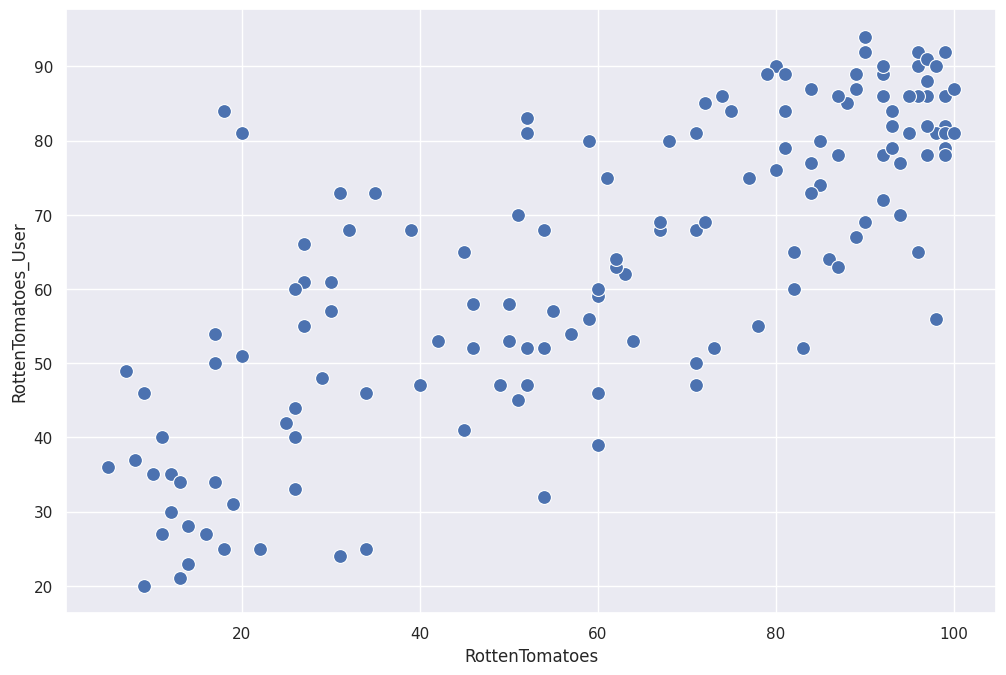

In [103]:
# CODE HERE
plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(x='RottenTomatoes',y='RottenTomatoes_User',data=all_sites,s=100)

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

**TASK: Create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_User**

In [104]:
#CODE HERE 'RottenTomatoes',y='RottenTomatoes_User',data=all_sites
all_sites['Rotten_Diff']=all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

**TASK: Calculate the Mean Absolute Difference between RT scores and RT User scores as described above.**

In [105]:
# CODE HERE
s=(all_sites['Rotten_Diff'].apply(lambda a:abs(a))).mean()
s

15.095890410958905

**TASK: Plot the distribution of the differences between RT Critics Score and RT User Score. There should be negative values in this distribution plot. Feel free to use KDE or Histograms to display this distribution.**

<Figure size 864x576 with 0 Axes>

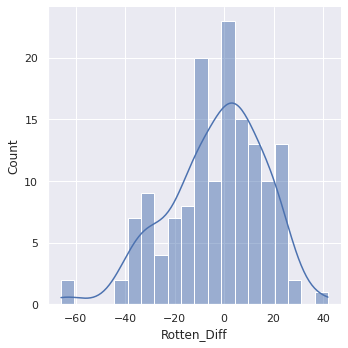

In [106]:
#CODE HERE
plt.figure(figsize=(12,8))
sns.displot(data=all_sites,x='Rotten_Diff',kde=True,bins=20) 


**TASK: Now create a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

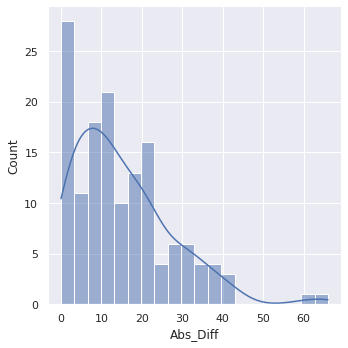

In [107]:
#CODE HERE
all_sites['Abs_Diff']=abs(all_sites['Rotten_Diff'])
sns.set(rc = {'figure.figsize':(20,12)})
sns.displot(data=all_sites,x='Abs_Diff',kde=True,bins=20) 

**Let's find out which movies are causing the largest differences. First, show the top 5 movies with the largest *negative* difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

**TASK: What are the top 5 movies users rated higher than critics on average:**

In [108]:
# CODE HERE
df= all_sites.sort_values('Rotten_Diff', ascending=True)
df[['FILM','Rotten_Diff']].head()


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**TASK: Now show the top 5 movies critics scores higher than users on average.**

In [109]:
# CODE HERE
df= all_sites.sort_values('Rotten_Diff', ascending=False)
df[['FILM','Rotten_Diff']].head()

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

**TASK: Display a scatterplot of the Metacritic Rating versus the Metacritic User rating.**

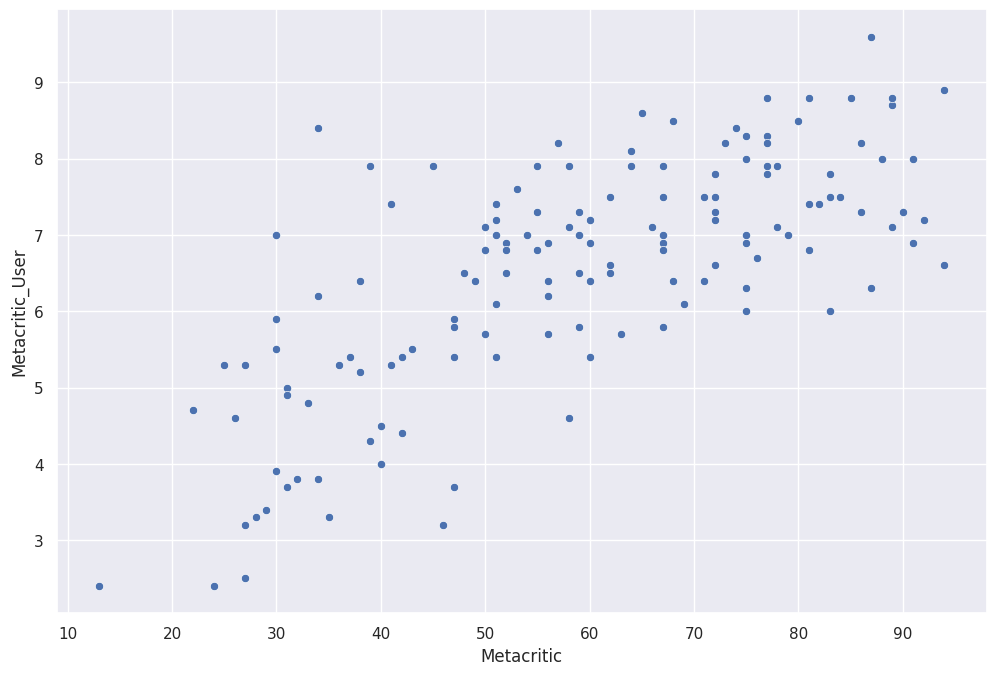

In [110]:
# CODE HERE
plt.figure(figsize=(12,8),dpi=100) 
sns.scatterplot(x='Metacritic',y='Metacritic_User',data=all_sites) 

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

**TASK: Create a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

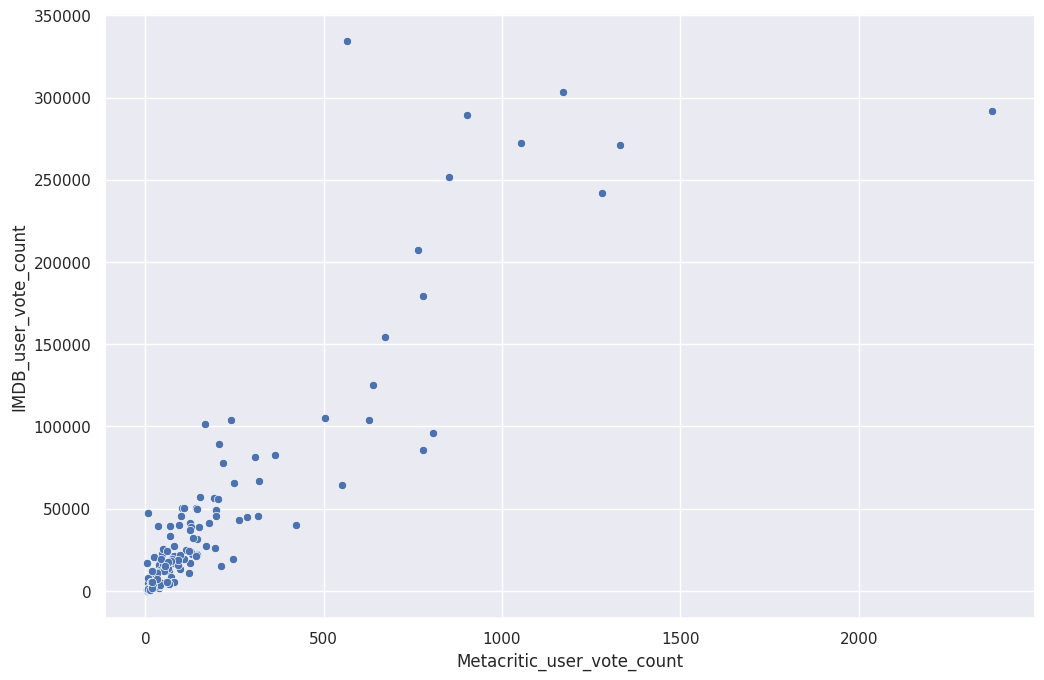

In [111]:
#CODE HERE
plt.figure(figsize=(12,8),dpi=100) 
sns.scatterplot(x='Metacritic_user_vote_count',y='IMDB_user_vote_count',data=all_sites) 

**Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?**

**TASK: What movie has the highest IMDB user vote count?**

In [112]:
#CODE HERE
mx_IMDB=all_sites[all_sites["IMDB_user_vote_count"]==all_sites["IMDB_user_vote_count"].max()]
mx_IMDB

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Abs_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


**TASK: What movie has the highest Metacritic User Vote count?**

In [113]:
#CODE HERE
mx_Metacritic=all_sites[all_sites["Metacritic_user_vote_count"]==all_sites["Metacritic_user_vote_count"].max()]
mx_Metacritic

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Abs_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**TASK: Combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so do an *inner* merge to merge together both DataFrames based on the FILM columns.**

In [125]:
#CODE HERE
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Abs_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,14


In [126]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [133]:
df=pd.merge(fandango, all_sites , how='inner',on="FILM")
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Abs_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9,9


In [138]:
print(df.columns)
print()
print(len(df))
print()
df.isnull().sum()

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff',
       'Abs_Diff'],
      dtype='object')

145



FILM                          0
STARS                         0
RATING                        0
VOTES                         0
YEAR                          0
RottenTomatoes                0
RottenTomatoes_User           0
Metacritic                    0
Metacritic_User               0
IMDB                          0
Metacritic_user_vote_count    0
IMDB_user_vote_count          0
Rotten_Diff                   0
Abs_Diff                      0
dtype: int64

### Normalize columns to Fandango STARS and RATINGS 0-5 

Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

**TASK: Create new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango. There are many ways to do this.**

Hint link: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame


Easier Hint:

Keep in mind, a simple way to convert ratings:
* 100/20 = 5 
* 10/2 = 5

In [144]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff',
       'Abs_Diff'],
      dtype='object')

In [145]:
# CODE HERE
#df.head()
#the Ratings in the df: STARS (Fandango Ratings), RottenTomatoes, Metric, IMDB
mn_F=df['STARS'].min() #Fandango 
mx_F=df['STARS'].max() #Fandango 

mn_R=df["RottenTomatoes"].min() #Rotten Tomatoes
mx_R=df['RottenTomatoes'].max() #Rotten Tomatoes

mn_M=df["Metacritic"].min() #Metacritic
mx_M=df['Metacritic'].max() #Metacritic

mn_I=df["IMDB"].min() #IMDB
mx_I=df['IMDB'].max() #IMDB

print(f'The min value for Fandango is {mn_F}, The max value for Fandango is {mx_F}')
print(f'The min value for RottenTomatoes is {mn_R}, The max value for RottenTomatoes is {mx_R}')
print(f'The min value for Metacritic is {mn_M}, The max value for Metacritic is {mx_M}')
print(f'The min value for IMDB is {mn_I}, The max value for IMDB is {mx_I}')


The min value for Fandango is 3.0, The max value for Fandango is 5.0
The min value for RottenTomatoes is 5, The max value for RottenTomatoes is 100
The min value for Metacritic is 13, The max value for Metacritic is 94
The min value for IMDB is 4.0, The max value for IMDB is 8.6


In [152]:
#from that; the rating for: RottenTomatoes and Metacritic out of 100
#                           IMDB out of 10

# By make a linear relation the RottenTomatoes and Metacritic input from 0 to 100, and output 0 to 5
#then the equation to convert is (5-0)/(100-0)=0.05 
#0.05 is the slope of equation, the intecept point is zero

#for the IMDB, the input from 0 to 10, the output 0 to 5
#then the equation to convert is (5-0)/(10-0)=0.5
#0.5 is the slope of equation, the intecept point is zero

#so; the new columns with scale to 5 will be generated as below:

df['Fandango_RATING']=df['RATING']
df['RottenTomatoes_RATING']=df['RottenTomatoes']*0.05
df['Metacritic_RATING']=df['Metacritic']*0.05
df['IMDB_RATING']=df['IMDB']*0.5
df.head(1)

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Abs_Diff,Fandango_RATING,RottenTomatoes_RATING,Metacritic_RATING,IMDB_RATING
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17,3.9,1.25,2.3,2.1


**TASK: Now create a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.**

In [153]:
#CODE HERE
norm_scores=df[['FILM','STARS','Fandango_RATING','RottenTomatoes_RATING','Metacritic_RATING','IMDB_RATING']]
norm_scores.head(1)

,FILM,STARS,Fandango_RATING,RottenTomatoes_RATING,Metacritic_RATING,IMDB_RATING
0,Fifty Shades of Grey (2015),4.0,3.9,1.25,2.3,2.1


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?


**TASK: Create a plot comparing the distributions of normalized ratings across all sites. There are many ways to do this, but explore the Seaborn KDEplot docs for some simple ways to quickly show this. Don't worry if your plot format does not look exactly the same as ours, as long as the differences in distribution are clear.**

Quick Note if you have issues moving the legend for a seaborn kdeplot: https://github.com/mwaskom/seaborn/issues/2280

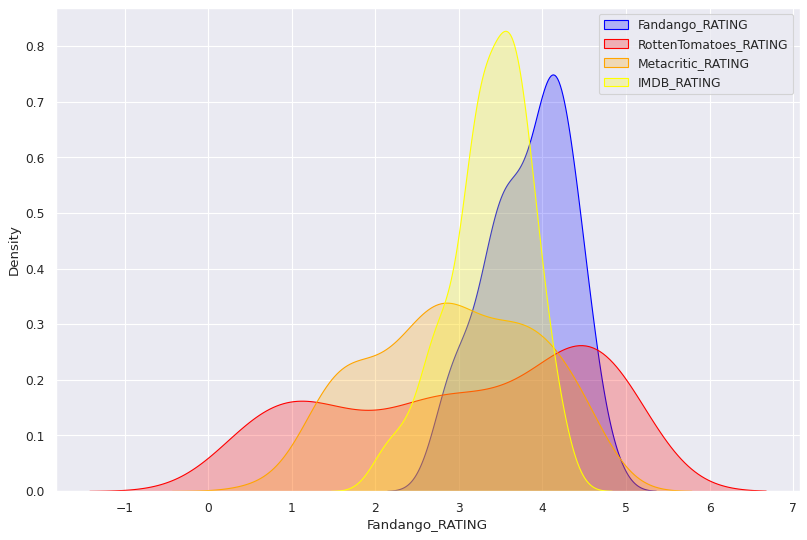

In [170]:
#CODE HERE
plt.figure(figsize=(12,8),dpi=80)
sns.kdeplot(data=norm_scores,x='Fandango_RATING',color='blue',fill=True,label="Fandango_RATING") 
sns.kdeplot(data=norm_scores,x='RottenTomatoes_RATING',color='red',fill=True,label="RottenTomatoes_RATING") 
sns.kdeplot(data=norm_scores,x='Metacritic_RATING',color='orange',fill=True,label="Metacritic_RATING") 
sns.kdeplot(data=norm_scores,x='IMDB_RATING',color='yellow',fill=True,label="IMDB_RATING") 
plt.legend()

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

**TASK: Create a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.**

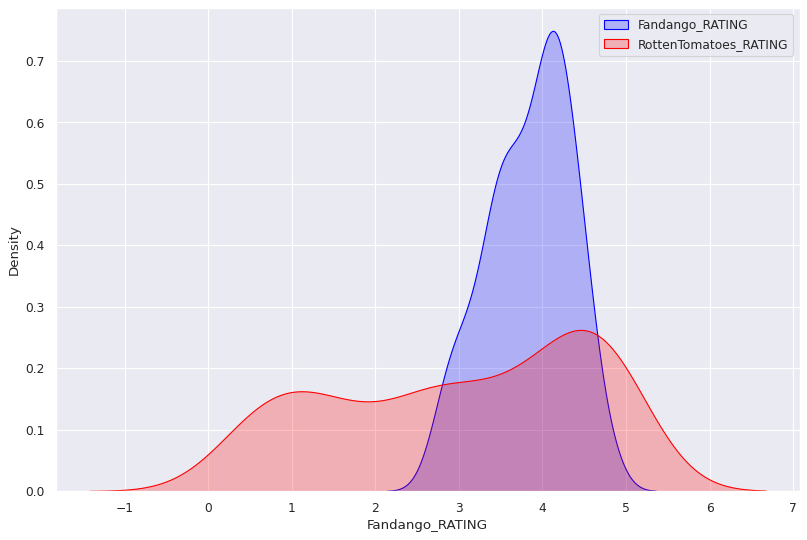

In [171]:
#CODE HERE
plt.figure(figsize=(12,8),dpi=80)
sns.kdeplot(data=norm_scores,x='Fandango_RATING',color='blue',fill=True,label="Fandango_RATING") 
sns.kdeplot(data=norm_scores,x='RottenTomatoes_RATING',color='red',fill=True,label="RottenTomatoes_RATING") 
plt.legend()

**OPTIONAL TASK: Create a histplot comparing all normalized scores.**

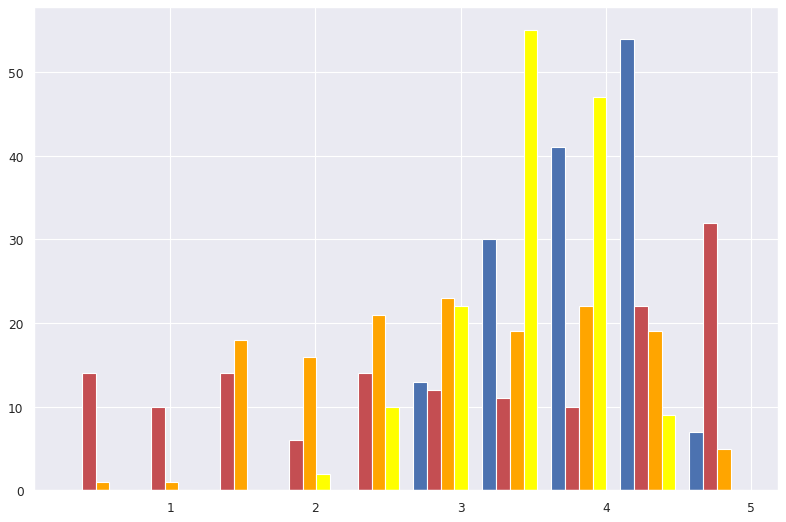

In [178]:
#CODE HERE
plt.figure(figsize=(12,8),dpi=80)
plt.hist([norm_scores['Fandango_RATING'], norm_scores['RottenTomatoes_RATING'],norm_scores['Metacritic_RATING'],norm_scores['IMDB_RATING']],color=['b', 'r','orange','yellow'])
plt.show()


### How are the worst movies rated across all platforms?

**TASK: Create a clustermap visualization of all normalized scores. Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies. Note: This clustermap does not need to have the FILM titles as the index, feel free to drop it for the clustermap.**

In [181]:
# CODE HERE
DF=norm_scores.drop("FILM",axis=1)
DF

,STARS,Fandango_RATING,RottenTomatoes_RATING,Metacritic_RATING,IMDB_RATING
0,4.0,3.9,1.25,2.30,2.10
1,4.5,4.5,3.55,2.95,3.65
2,5.0,4.8,3.60,3.60,3.70
3,5.0,4.8,4.05,3.35,3.70
4,4.5,4.5,4.90,4.70,4.30
...,...,...,...,...,...
140,3.5,3.5,4.35,3.40,3.35
141,4.0,3.6,4.75,4.35,3.50
142,4.5,4.2,4.65,3.35,3.90
143,4.0,3.9,4.75,4.30,3.70


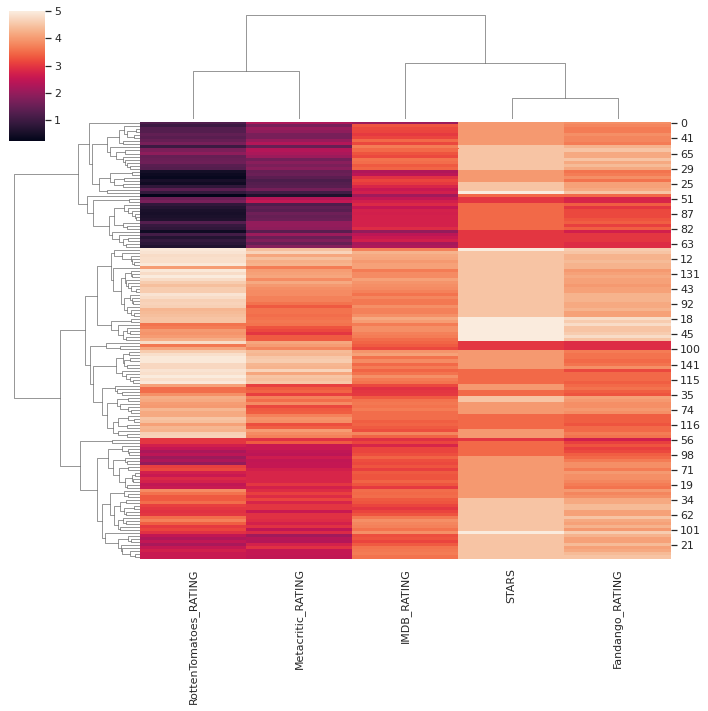

In [182]:
sns.clustermap(DF)

**TASK: Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies? You may need to add the FILM column back in to your DataFrame of normalized scores to see the results.**

In [189]:
# CODE HERE
a=norm_scores.sort_values('RottenTomatoes_RATING', ascending=True)
A=a.head(10)
A

,FILM,STARS,Fandango_RATING,RottenTomatoes_RATING,Metacritic_RATING,IMDB_RATING
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.25,0.65,2.15
84,Hitman: Agent 47 (2015),4.0,3.9,0.35,1.40,2.95
54,Hot Pursuit (2015),4.0,3.7,0.40,1.55,2.45
25,Taken 3 (2015),4.5,4.1,0.45,1.30,3.05
28,Fantastic Four (2015),3.0,2.7,0.45,1.35,2.00
50,The Boy Next Door (2015),4.0,3.6,0.50,1.50,2.30
88,The Loft (2015),4.0,3.6,0.55,1.20,3.15
87,Unfinished Business (2015),3.5,3.2,0.55,1.60,2.70
78,Mortdecai (2015),3.5,3.2,0.60,1.35,2.75
77,Seventh Son (2015),3.5,3.2,0.60,1.50,2.75


**FINAL TASK: Visualize the distribution of ratings across all sites for the top 10 worst movies.**

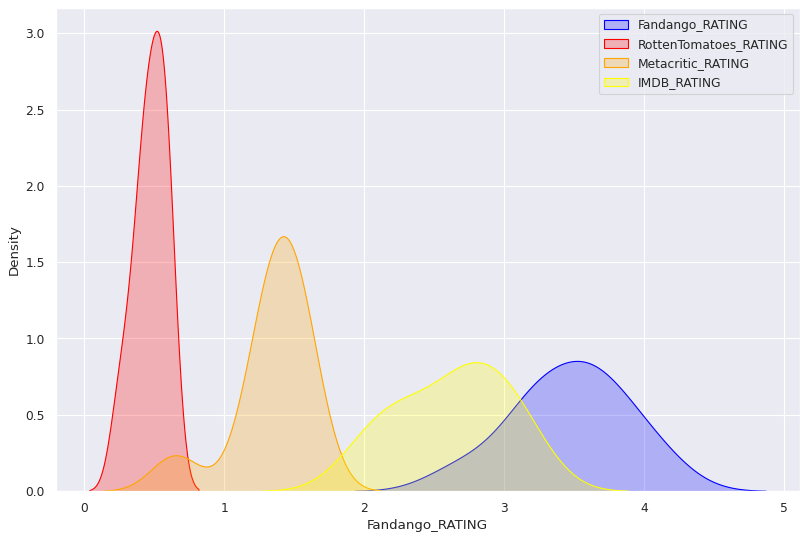

In [190]:
# CODE HERE
plt.figure(figsize=(12,8),dpi=80)
sns.kdeplot(data=A,x='Fandango_RATING',color='blue',fill=True,label="Fandango_RATING") 
sns.kdeplot(data=A,x='RottenTomatoes_RATING',color='red',fill=True,label="RottenTomatoes_RATING") 
sns.kdeplot(data=A,x='Metacritic_RATING',color='orange',fill=True,label="Metacritic_RATING") 
sns.kdeplot(data=A,x='IMDB_RATING',color='yellow',fill=True,label="IMDB_RATING") 
plt.legend()

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final thoughts: Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**